In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
df=pd.read_csv('MobilesDataset_2025.csv',encoding='ISO-8859-1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


Some datasets contain special characters (like é, ü, ñ) that may cause encoding errors when reading with UTF-8.
ISO-8859-1 can help avoid errors like UnicodeDecodeError.

# Data cleaning & Preprocessing

## Checking for missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [8]:
# there are no missing value in the dataset

# convert price into common currency

In [9]:
# Define exchange rates manually (1 unit in local currency = X USD)
exchange_rates = {
    'PKR': 0.0036,  # 1 PKR = 0.0036 USD
    'INR': 0.012,   # 1 INR = 0.012 USD
    'CNY': 0.14,    # 1 CNY = 0.14 USD
    'USD': 1.0,     # 1 USD = 1 USD
    'AED': 0.27     # 1 AED = 0.27 USD
}

# Columns to process
columns_to_change = ['Launched Price (Pakistan)', 'Launched Price (India)',
                     'Launched Price (China)', 'Launched Price (USA)', 
                     'Launched Price (Dubai)']

# Convert to USD
for cols in columns_to_change:
    df[cols] = df[cols].astype(str)  # PKR 224,999 to string
    df[cols + ' USD'] = df[cols].apply( # create a new col name and apply lambda 
        lambda x: exchange_rates.get(x.split()[0], None) * float(x.split()[1].replace(",", ""))  # the exchange_rates.get(key, default_value) so it returns 0.0036 for key=pkr and _> get the other split[1] thats 224,999 and replce , make it 224999 and convert to float and multiple  
        if isinstance(x, str) and len(x.split())  == 2 and x.split()[0] in exchange_rates else None #checks if x is string, length after spliting is 2 and pkr is present in exchange rate
    )

# Drop original columns
df = df.drop(columns = columns_to_change)

exchange_rates.get(key, default_value) is a dictionary method that:
Returns the value for key (the exchange rate).
Returns None if key is not found (avoiding errors instead of crashing).

In [10]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,809.9964,959.988,811.86,799.0,755.73
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,845.9964,1019.988,853.86,849.0,809.73
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,881.9964,1079.988,909.86,899.0,863.73
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,899.9964,1079.988,867.86,899.0,863.73
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,935.9964,1139.988,909.86,949.0,917.73


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   930 non-null    object 
 1   Model Name                     930 non-null    object 
 2   Mobile Weight                  930 non-null    object 
 3   RAM                            930 non-null    object 
 4   Front Camera                   930 non-null    object 
 5   Back Camera                    930 non-null    object 
 6   Processor                      930 non-null    object 
 7   Battery Capacity               930 non-null    object 
 8   Screen Size                    930 non-null    object 
 9   Launched Year                  930 non-null    int64  
 10  Launched Price (Pakistan) USD  929 non-null    float64
 11  Launched Price (India) USD     930 non-null    float64
 12  Launched Price (China) USD     929 non-null    flo

one missing value in Launched price (Pakistan) and Launched Price (China)

# Convert columns to string first, then remove units and convert to numbers

for 
- mobile weight
- ram
- front camera
- back camera
- battery capacity
- screen size

In [14]:
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,809.9964,959.988,811.86,799.0,755.73
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,845.9964,1019.988,853.86,849.0,809.73
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,881.9964,1079.988,909.86,899.0,863.73
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,899.9964,1079.988,867.86,899.0,863.73
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,935.9964,1139.988,909.86,949.0,917.73


In [ ]:
df['RAM'] = df['RAM'].astype(str).str.split('/').str[0].str.extract(r'(\d+)').astype(float) #you can do this oneline code

RAM (original)	Step 2 (split /)	Step 3 (extract \d+)	Step 4 (final float)

"6GB"	        "6GB"	            "6"	                        6.0
"8GB/256GB"	     "8GB"	            "8"	                        8.0

In [ ]:
# df['RAM'] = df['RAM'].astype(str).str.strip()  # Remove spaces
# df['RAM'] = df['RAM'].replace('nan', None)    # Replace 'nan' strings (from NaN values)
# df['RAM'] = df['RAM'].str.replace('GB', '', regex=False)  # Remove 'GB'
# df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')  # Convert to float, setting errors to NaN


In [18]:
df['Front Camera'] = df['Front Camera'].astype(str).str.split('/').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Back Camera'] = df['Back Camera'].astype(str).str.split('+').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '').str.replace('mAh', '').astype(float)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)


In [20]:
df.sample(5)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
510,Realme,Pad 2 128GB,482.0,6.0,8.0,8.0,MediaTek Helio G99,8360.0,11.50,2023,269.9964,335.988,280.00,280.0,283.50
390,Oppo,Reno7 5G 128GB,173.0,8.0,32.0,64.0,Dimensity 900,4500.0,6.40,2021,287.9964,347.988,279.86,349.0,350.73
791,Infinix,Hot 10 Lite 64GB,195.0,3.0,8.0,13.0,MediaTek Helio A25,5000.0,6.60,2020,71.9964,95.988,97.86,109.0,107.73
258,Vivo,V19 256GB,176.0,8.0,32.0,48.0,Qualcomm Snapdragon 712,4500.0,6.44,2020,197.9964,383.880,447.86,429.0,431.73
441,Oppo,K10x 128GB,195.0,6.0,16.0,64.0,Qualcomm Snapdragon 695,5000.0,6.59,2022,197.9964,203.880,209.86,199.0,270.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   930 non-null    object 
 1   Model Name                     930 non-null    object 
 2   Mobile Weight                  930 non-null    float64
 3   RAM                            928 non-null    float64
 4   Front Camera                   930 non-null    float64
 5   Back Camera                    930 non-null    float64
 6   Processor                      930 non-null    object 
 7   Battery Capacity               930 non-null    float64
 8   Screen Size                    930 non-null    float64
 9   Launched Year                  930 non-null    int64  
 10  Launched Price (Pakistan) USD  929 non-null    float64
 11  Launched Price (India) USD     930 non-null    float64
 12  Launched Price (China) USD     929 non-null    flo

Now dataset is clean and ready for analysis

# Descriptive Statistics & Summary

In [22]:
df.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
count,930.000000,928.000000,930.000000,930.000000,930.000000,930.000000,930.000000,929.000000,930.000000,929.000000,930.000000,930.000000
mean,228.267097,7.784483,18.163011,46.764301,5026.163441,7.083796,2022.193548,451.569829,606.921819,533.466459,625.515763,589.662000
std,105.432503,3.183086,11.986228,31.069901,1355.548264,1.533690,1.862080,365.736681,491.522152,384.622711,1347.561211,422.720543
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,2014.000000,57.596400,71.988000,69.860000,79.000000,80.730000
25%,185.000000,6.000000,8.000000,16.000000,4402.500000,6.500000,2021.000000,197.996400,239.988000,237.860000,250.000000,270.000000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,2023.000000,306.000000,419.988000,392.000000,449.000000,452.250000
75%,208.000000,8.000000,32.000000,50.000000,5091.250000,6.780000,2024.000000,647.996400,898.800000,769.860000,849.000000,863.730000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,2025.000000,2177.996400,3299.988000,2519.860000,39622.000000,2996.730000


In [23]:
df.median(numeric_only=True)

Mobile Weight                     194.000
RAM                                 8.000
Front Camera                       16.000
Back Camera                        50.000
Battery Capacity                 5000.000
Screen Size                         6.670
Launched Year                    2023.000
Launched Price (Pakistan) USD     306.000
Launched Price (India) USD        419.988
Launched Price (China) USD        392.000
Launched Price (USA) USD          449.000
Launched Price (Dubai) USD        452.250
dtype: float64

## General Trends

>   * The average mobile weight is around 228g, but the median weight is 194g, indicating that most devices are lighter while a few heavier models (up to 732g) pull the average up.

>   * RAM typically falls around 8GB, with a minimum of 1GB and a maximum of 16GB.

>   * The front camera averages 18MP, with a median of 16MP.

>   * the back camera averages 47MP, with a median of 50MP and some premium models reaching 200MP.

>   * Battery capacity has a mean of 5028mAh and a median of 5000mAh, with values ranging from 2000mAh to 11200mAh.

>   * Screen sizes vary from 5.0 to 14.6 inches, with an average of 7.08 inches and a median of 6.67 inches, suggesting that most devices are slightly below the mean.

>   * The majority of phones are from 2022 to 2024, with a median launch year of 2023, though some older models date back to 2014.

# Pricing Insights

>   * The median price in Pakistan is around 306, while the mean is higher at 449.71 due to expensive models in the dataset, with prices ranging from 57 to 1980.

>   * In India, the median price is 420, while the mean is 603.50, with a maximum price of 3299.   

>   * In China, the median price is 392, slightly lower than in India, with a mean of 531.33 and prices ranging from 70 to 2519.  

>   * In the USA, the median price is 449, but the mean is significantly inflated at 622.38 due to an extreme outlier at 39,622.   

>   * Dubai has a median price of 452.25, closely matching the USA, with a mean of 586.31 and prices ranging from 81 to 2997.   

**The large difference between mean and median prices suggests the presence of high-end luxury models that significantly impact average pricing**.


## The Most Expensive Mobile model in india

In [ ]:
most_expensive = df.loc[df['Launched Price (India) USD'].idxmax()]  #the loc is used to select the row of that index  and the idxmax is used to find the index of the max value in that column
most_expensive

Company Name                            Huawei
Model Name                       Mate XT 512GB
Mobile Weight                            245.0
RAM                                       12.0
Front Camera                              13.0
Back Camera                               50.0
Processor                           Kirin 9010
Battery Capacity                        5000.0
Screen Size                               7.92
Launched Year                             2024
Launched Price (Pakistan) USD        1403.9964
Launched Price (India) USD            3299.988
Launched Price (China) USD             2029.86
Launched Price (USA) USD                2799.0
Launched Price (Dubai) USD             2996.73
Name: 661, dtype: object

## The Least Expensive Mobile Model

In [26]:
least_expensive = df.loc[df['Launched Price (India) USD'].idxmin()]
least_expensive

Company Name                                Infinix
Model Name                            Smart HD 32GB
Mobile Weight                                 195.0
RAM                                             2.0
Front Camera                                    5.0
Back Camera                                     8.0
Processor                        MediaTek Helio A20
Battery Capacity                             5000.0
Screen Size                                     6.1
Launched Year                                  2020
Launched Price (Pakistan) USD               57.5964
Launched Price (India) USD                   71.988
Launched Price (China) USD                    69.86
Launched Price (USA) USD                       79.0
Launched Price (Dubai) USD                    80.73
Name: 796, dtype: object

# Price Trend Analysis Over Years

In [33]:
avg_price_per_year = df.groupby('Launched Year')['Launched Price (India) USD'].mean()
avg_price_per_year

Launched Year
2014    167.988000
2016    205.144800
2017    489.033333
2018    679.687429
2019    603.460696
2020    602.515485
2021    506.829688
2022    586.536322
2023    621.657848
2024    662.124493
2025    451.988000
Name: Launched Price (India) USD, dtype: float64

## visualization

<Axes: xlabel='Launched Year', ylabel='Launched Price (India) USD'>

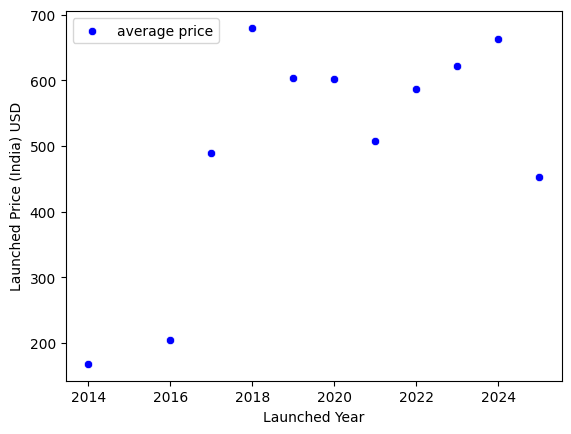

In [34]:
sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='blue')

plt.figure() → Creates a new figure.

figsize=(10,5) → Sets the width and height of the figure in inches.

10 inches wide

5 inches tall

<Axes: xlabel='Launched Year', ylabel='Launched Price (India) USD'>

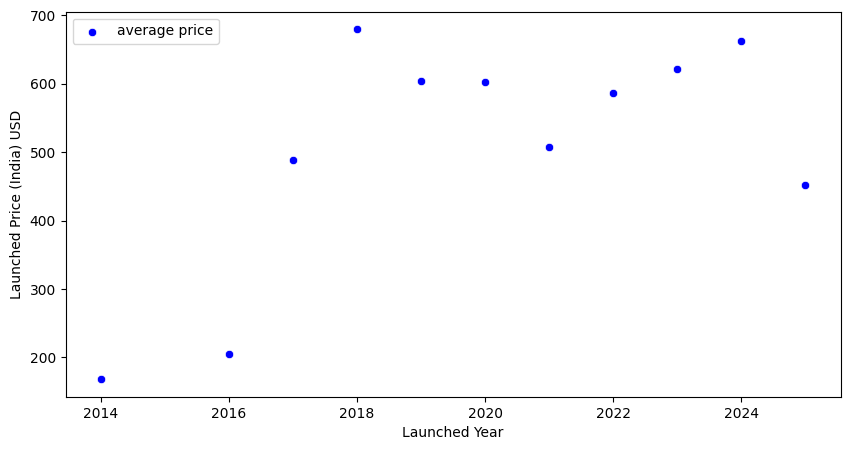

In [36]:
plt.figure(figsize=(10,5)) 

sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='blue')

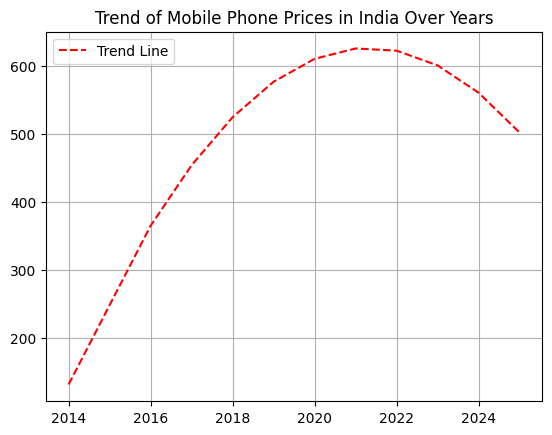

In [ ]:
# Fit a polynomial trend line (degree=2)
z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)

p = np.poly1d(z) #This code takes the polynomial coefficients stored in z (from np.polyfit()) and creates a polynomial function that can be used to compute values for any input.

# Plot trend line
plt.plot(avg_price_per_year.index, p(avg_price_per_year.index), 
         color='red', linestyle="--", label="Trend Line")

plt.title("Trend of Mobile Phone Prices in India Over Years")
plt.legend()
plt.grid(True)
plt.show()

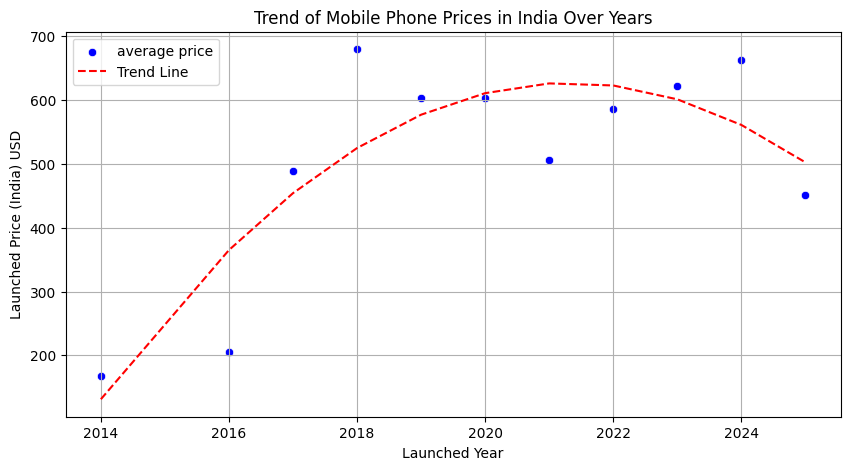

In [38]:
plt.figure(figsize=(10,5))

# Scatter plot of average prices
sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='blue')

# Fit a polynomial trend line (degree=2)
z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)
p = np.poly1d(z)

# Plot trend line
plt.plot(avg_price_per_year.index, p(avg_price_per_year.index), 
         color='red', linestyle="--", label="Trend Line")

plt.title("Trend of Mobile Phone Prices in India Over Years")
plt.legend()
plt.grid(True)
plt.show()

1. Steady Increase (2014 - 2018):

* Prices increased significantly from 167.99 (2014) → 679.69 (2018).
* Possible reasons: New technology, better features, and higher consumer demand.
  
2. Fluctuations (2019 - 2021):

* Prices dropped from 679.69 (2018) to 506.83 (2021).
* Possible reasons:
    * Competitive pricing from brands like Xiaomi & Realme.
    * Improved manufacturing efficiency.
    * More budget-friendly models in the market.
      
3️. Recovery & Growth (2022 - 2024):

* Prices rose again from 506.83 (2021) → 651.54 (2024).
* Possible reasons: Adoption of 5G, AI-powered cameras, and premium features.
  
4️. Price Drop in 2025:

* Sharp decline to 451.99 (2025).
* Possible reasons:
      * Market saturation (most users already have a smartphone).
      * Affordable models gaining popularity.
      * Economic factors (inflation, currency fluctuations).

## Conclusion:

* The mobile phone market shows a general upward trend in pricing.
* However, price fluctuations occur due to market competition, consumer demand, and technology shifts.

# Popularity of RAM & Camera Configurations

## Most Common RAM

In [39]:
df['RAM'].mode()[0]

8.0

> 8 GB is most commonly used RAM

## Most common camera configurations

In [41]:
front_camera=df['Front Camera'].mode()[0]
print('most common front camera',front_camera,'MP')
back_camera=df['Back Camera'].mode()[0]
print('most common Back camera',back_camera,'MP')

most common front camera 16.0 MP
most common Back camera 50.0 MP


## Relationship between RAM and Price in India 

In [45]:
avg_price_per_ram = df.groupby('RAM')['Launched Price (India) USD'].mean()
avg_price_per_ram

RAM
1.0      131.988000
1.5      110.988000
2.0      117.970000
3.0      298.954941
4.0      390.470301
6.0      527.332136
8.0      552.284260
10.0     611.988000
12.0     933.537886
16.0    1098.181548
Name: Launched Price (India) USD, dtype: float64

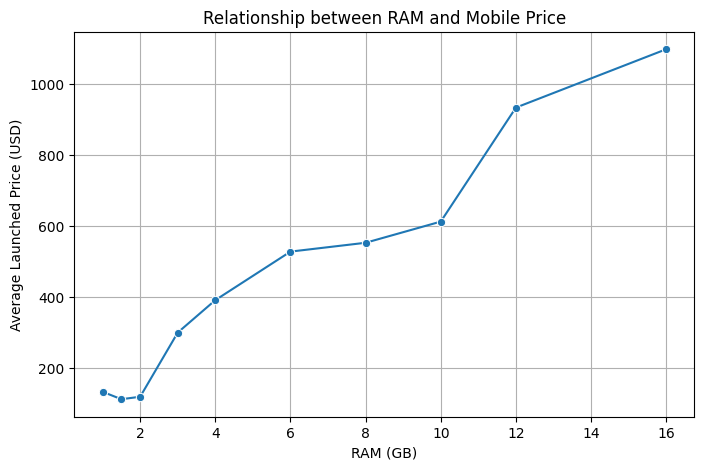

In [46]:
# Plotting RAM vs. Price
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_price_per_ram.index,
             y=avg_price_per_ram,
             marker='o')

plt.xlabel("RAM (GB)")
plt.ylabel("Average Launched Price (USD)")
plt.title("Relationship between RAM and Mobile Price")
plt.grid(True)
plt.show()

> The average price of mobile phones increases with RAM, indicating a positive correlation between RAM size and price.

# Price Variations Across Countries

In [52]:
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,809.9964,959.988,811.86,799.0,755.73
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,845.9964,1019.988,853.86,849.0,809.73
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,881.9964,1079.988,909.86,899.0,863.73
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,899.9964,1079.988,867.86,899.0,863.73
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,935.9964,1139.988,909.86,949.0,917.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,2024,238.3920,287.988,293.86,280.0,277.83
926,Poco,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,2024,256.3920,311.988,321.86,300.0,296.73
927,Samsung,Galaxy Z Fold6 256GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,2024,2177.9964,1979.988,NaN,1899.0,1943.73
928,Samsung,Galaxy Z Fold6 512GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,2024,1961.9964,2123.988,2239.86,1719.0,2078.73


In [55]:
avg_price_by_country = df[
    ["Launched Price (Pakistan) USD", 
     "Launched Price (India) USD", 
     "Launched Price (China) USD", 
     "Launched Price (USA) USD", 
     "Launched Price (Dubai) USD"]
].mean().sort_values(ascending=False)
avg_price_by_country

Launched Price (USA) USD         625.515763
Launched Price (India) USD       606.921819
Launched Price (Dubai) USD       589.662000
Launched Price (China) USD       533.466459
Launched Price (Pakistan) USD    451.569829
dtype: float64

C:\Users\hp.1\AppData\Local\Temp\ipykernel_1140\859419929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")


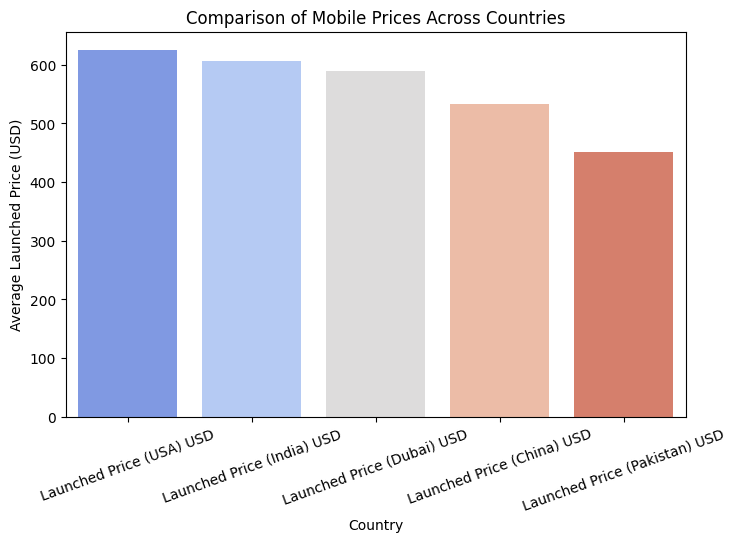

In [56]:
# Plot the average prices
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")

plt.xlabel("Country")
plt.ylabel("Average Launched Price (USD)")
plt.title("Comparison of Mobile Prices Across Countries")
plt.xticks(rotation=20)
plt.show()

>* USA has the highest prices (622) due to taxes and premium branding.
>* India (603) and Dubai (586) are slightly cheaper but still relatively high.
>* China (531) has lower prices due to local manufacturing.
>* Pakistan ($450) has the lowest prices as brands focus on affordability.

In [58]:
company_avg_price = df.groupby("Company Name")[
    ["Launched Price (Pakistan) USD", 
     "Launched Price (India) USD", 
     "Launched Price (China) USD", 
     "Launched Price (USA) USD", 
     "Launched Price (Dubai) USD"]
].mean()
company_avg_price

,Launched Price (Pakistan) USD,Launched Price (India) USD,Launched Price (China) USD,Launched Price (USA) USD,Launched Price (Dubai) USD
Company Name,,,,,
Apple,891.460318,1235.983175,1005.423711,1028.484536,994.554742
Google,620.567829,843.988000,848.526667,755.190476,816.158571
Honor,432.629367,586.207780,471.706154,607.571429,605.746484
Huawei,660.725143,1233.582857,960.790000,1116.571429,1126.015714
Infinix,158.074971,207.845143,218.610000,245.071429,245.863929
Lenovo,226.796400,304.708800,294.784000,311.666667,316.530000
Motorola,329.686723,404.310581,378.311613,433.258065,433.467581
Nokia,186.542182,165.260727,162.145455,3760.181818,178.200000
OnePlus,485.317291,548.818189,552.992075,608.622642,663.013019


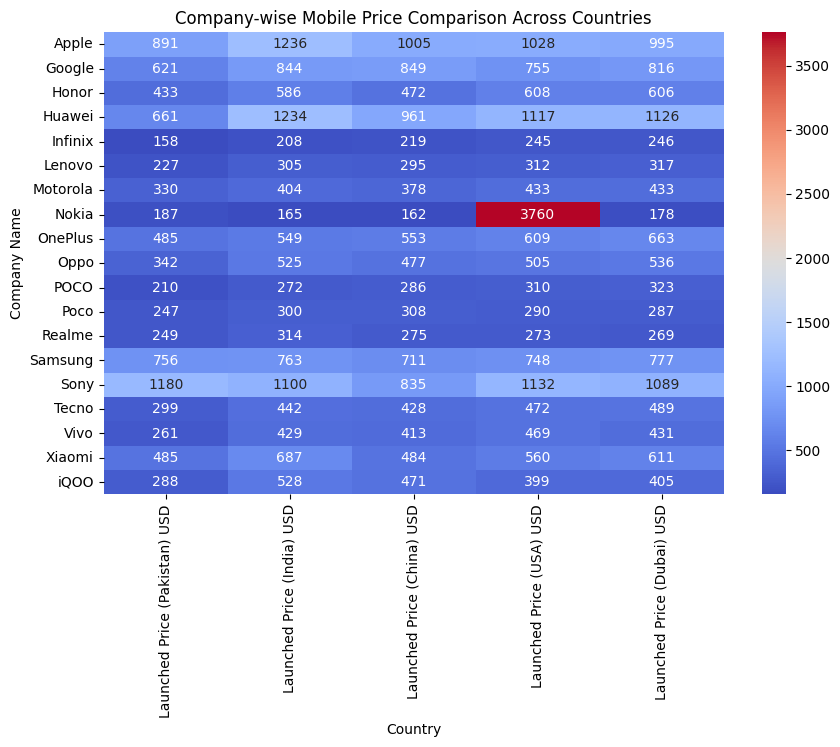

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(company_avg_price, annot=True, fmt=".0f", cmap="coolwarm")

plt.title("Company-wise Mobile Price Comparison Across Countries")
plt.xlabel("Country")
plt.ylabel("Company Name")
plt.show()

 1. Nokia has a significant outlier in the USA (3760), much higher than other regions. This may be a data entry issue or an extreme pricing case.
 2. Apple, Sony, and Huawei have the highest prices across all regions.
 3. Pakistan generally has the lowest prices, while India and the USA have higher prices.
 4. Budget brands like Infinix, Tecno, and Lenovo have consistently low prices across all countries.

# Brand Market share & Pricing strategy

In [60]:
# Count the number of mobile phones from each company
mobile_counts = df['Company Name'].value_counts().sort_values(ascending=False)
mobile_counts

Company Name
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

C:\Users\hp.1\AppData\Local\Temp\ipykernel_1140\2300419836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')


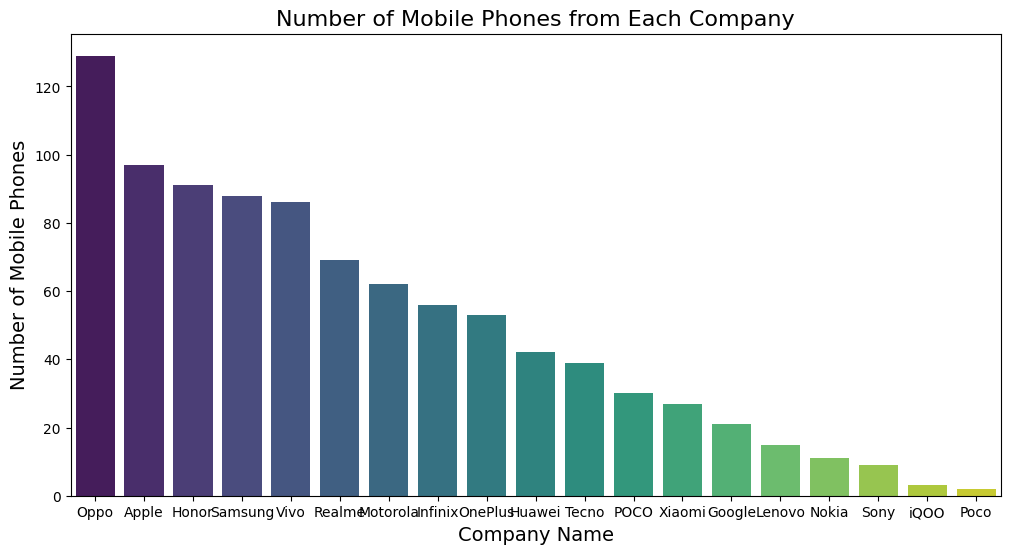

In [62]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Mobile Phones', fontsize=14)
plt.title('Number of Mobile Phones from Each Company', fontsize=16)
plt.xticks(rotation=0) 
plt.show()

## Insights

>* Oppo, Apple, and Honor lead in the number of models.
>* Xiaomi has fewer models than expected, possibly due to a refined strategy.
>* Google, Lenovo, and Nokia remain niche players focusing on specific segments.


## Pricing strategy in india

In [64]:
brand_pricing_india=df.groupby("Company Name")["Launched Price (India) USD"].describe()
brand_pricing_india = brand_pricing_india.sort_values(by="mean", ascending=False)
brand_pricing_india = brand_pricing_india.reset_index()
brand_pricing_india

,Company Name,count,mean,std,min,25%,50%,75%,max
0,Apple,97.0,1235.983175,354.118213,358.800,1018.800,1199.988,1439.988,2398.800
1,Huawei,42.0,1233.582857,807.235774,419.988,659.988,1019.988,1439.988,3299.988
2,Sony,9.0,1099.988000,368.646172,599.988,719.988,1139.988,1439.988,1559.988
3,Google,21.0,843.988000,430.753758,383.988,539.988,719.988,959.988,2159.988
4,Samsung,88.0,763.266000,555.422734,101.988,239.961,779.988,1138.800,2411.988
5,Xiaomi,27.0,687.099111,389.265712,179.988,317.988,839.988,1019.988,1319.988
6,Honor,91.0,586.207780,447.336557,131.988,263.988,419.988,779.988,1919.988
7,OnePlus,53.0,548.818189,235.164569,155.988,335.988,539.988,719.988,899.988
8,iQOO,3.0,527.988000,72.000000,455.988,491.988,527.988,563.988,599.988
9,Oppo,129.0,525.101395,354.589273,107.988,263.988,443.988,599.988,1919.988


C:\Users\hp.1\AppData\Local\Temp\ipykernel_1140\580754072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="viridis")


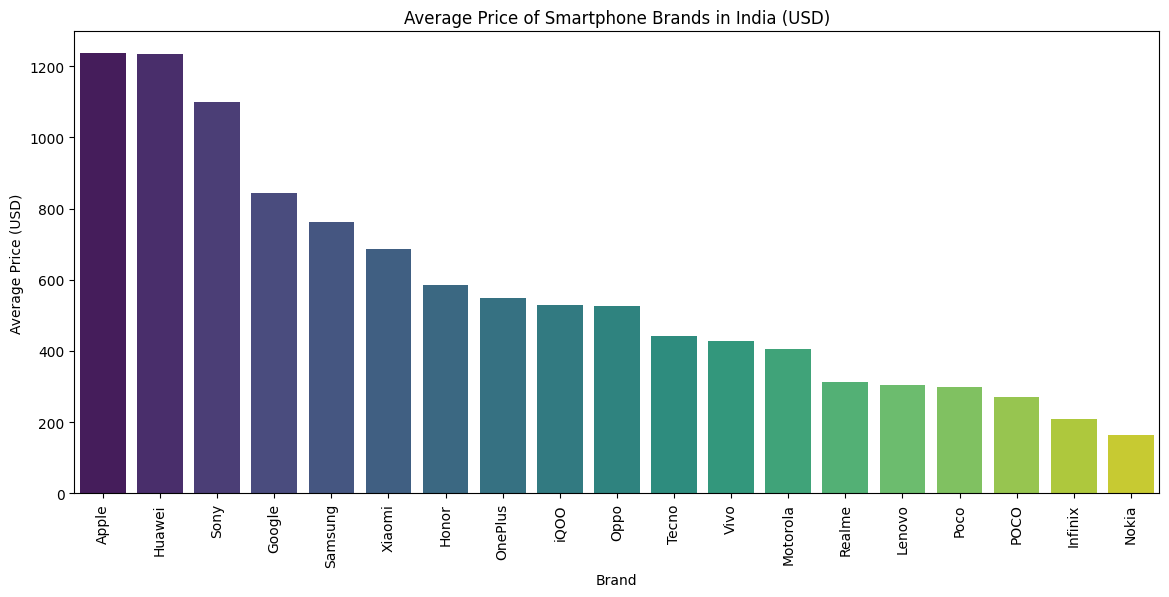

In [65]:
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="viridis")
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.title("Average Price of Smartphone Brands in India (USD)")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.show()

>* Apple, Huawei, and Sony cater to premium buyers, so their marketing likely targets professionals and tech enthusiasts.
>* Xiaomi, OnePlus, and Oppo provide value-for-money alternatives, attracting younger and tech-savvy consumers.
>* Infinix & Nokia focus on affordability, making them appealing for first-time smartphone users or those in price-sensitive markets.

# Conclusion for Mobile Price Analysis

The analysis of mobile price data provides valuable insights into pricing patterns, feature distribution, and their impact on affordability and customer preferences. Key takeaways include:

* Feature Influence on Price: Certain features, such as battery capacity, RAM, and storage, have a strong correlation with mobile price. Higher-end models generally offer better specifications, justifying their price point.
* Brand Segmentation: Different brands cater to specific price segments, with premium brands focusing on flagship devices while budget-friendly brands offer competitive features at lower prices.
* Market Trends: The data suggests clear pricing strategies, such as some brands prioritizing performance while others focus on affordability and accessibility.
* Potential Applications: These insights can help businesses optimize pricing strategies, assist consumers in making informed purchase decisions, and support data-driven marketing approaches.